In [1]:
import pandas as pd
import datetime as dt
from pathlib import Path
from matplotlib import pyplot
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

                  Open        High         Low       Close     Volume  Day  \
Date                                                                         
2014-01-02  155.887692  155.963959  154.616730  154.989548  119636900    2   
2014-01-03  155.252116  155.565629  154.743740  154.964035   81390600    3   
2014-01-06  155.472507  155.531812  154.277800  154.515045  108028200    6   
2014-01-07  155.133570  155.726683  155.014948  155.464020   86144200    7   
2014-01-08  155.438546  155.760527  154.964056  155.497864   96582300    8   

            Weekday  Week  Month  Year  
Date                                    
2014-01-02        3     1      1  2014  
2014-01-03        4     1      1  2014  
2014-01-06        0     2      1  2014  
2014-01-07        1     2      1  2014  
2014-01-08        2     2      1  2014  


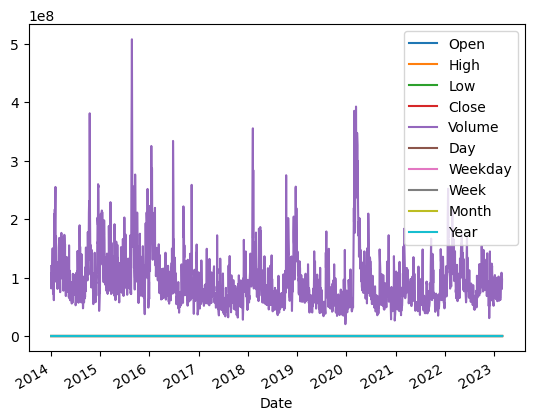

In [2]:
arima_df = pd.read_csv(Path("./Resources/spy.csv"), index_col="Date", parse_dates=True,infer_datetime_format=True)
print(arima_df.head())
arima_df.plot()
# pyplot.show()
arima_df.index = arima_df.index.to_period('M')

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2305
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -6038.691
Date:                Tue, 28 Mar 2023   AIC                          12089.381
Time:                        21:36:08   BIC                          12123.835
Sample:                    01-31-2014   HQIC                         12101.942
                         - 02-28-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0859      0.010     -8.266      0.000      -0.106      -0.066
ar.L2          0.0405      0.010      4.181      0.000       0.022       0.059
ar.L3         -0.0100      0.010     -0.965      0.3

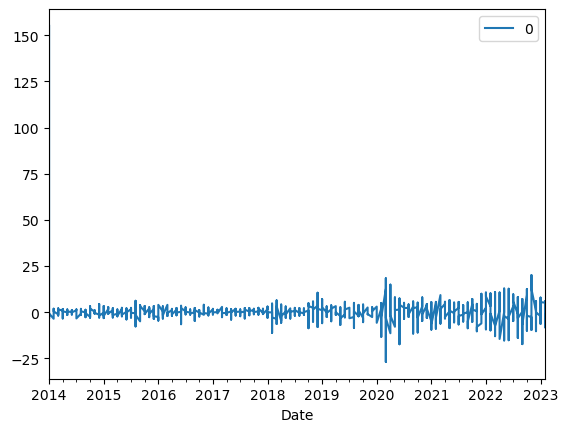

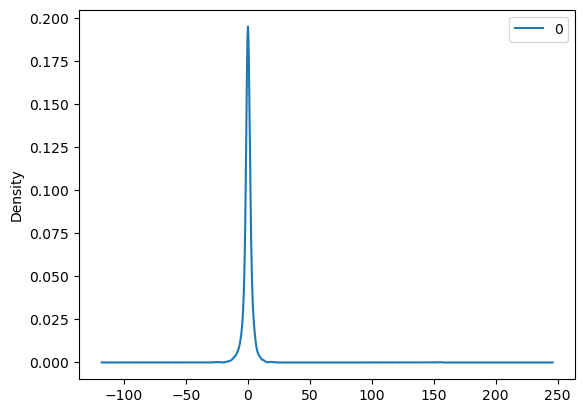

                 0
count  2305.000000
mean      0.179335
std       4.632671
min     -26.865681
25%      -0.911188
50%       0.153871
75%       1.402470
max     154.989548


In [3]:
# fit model
model = ARIMA(arima_df['Close'], order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2305
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -6038.691
Date:                Tue, 28 Mar 2023   AIC                          12089.381
Time:                        21:36:09   BIC                          12123.835
Sample:                    01-31-2014   HQIC                         12101.942
                         - 02-28-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0859      0.010     -8.266      0.000      -0.106      -0.066
ar.L2          0.0405      0.010      4.181      0.000       0.022       0.059
ar.L3         -0.0100      0.010     -0.965      0.3

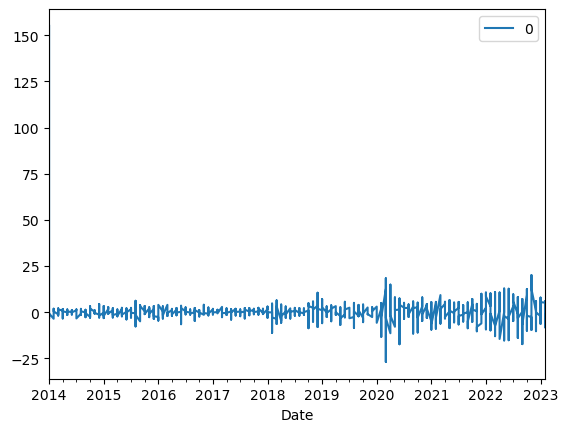

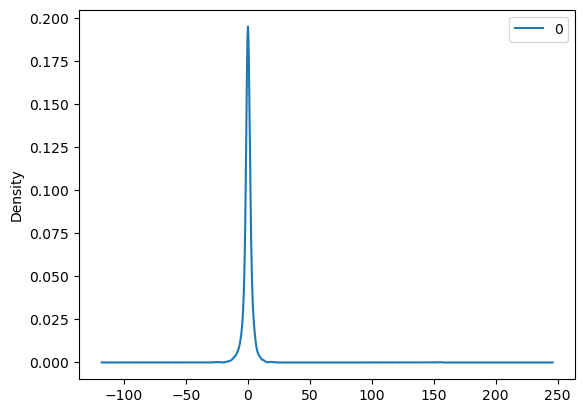

                 0
count  2305.000000
mean      0.179335
std       4.632671
min     -26.865681
25%      -0.911188
50%       0.153871
75%       1.402470
max     154.989548


In [4]:
# fit model
model = ARIMA(arima_df['Close'], order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [13]:
dict1 = {"tutor":"charles", "student":"bria"}
list() == []

['tutor', 'student']

predicted=315.318735, expected=316.444183
predicted=316.314329, expected=315.824585
predicted=315.870549, expected=315.862701
predicted=315.807032, expected=316.224945
predicted=316.095247, expected=313.412689
predicted=313.448286, expected=308.388886
predicted=308.601744, expected=311.620544
predicted=311.650756, expected=311.363129
predicted=311.166366, expected=312.373627
predicted=312.723349, expected=306.701599
predicted=306.808754, expected=308.979981
predicted=309.082200, expected=313.689270
predicted=313.309851, expected=317.311737
predicted=317.239563, expected=318.379425
predicted=318.406481, expected=316.682526
predicted=316.560073, expected=319.046753
predicted=318.901400, expected=319.599548
predicted=319.348752, expected=321.658661
predicted=321.681651, expected=321.315491
predicted=321.224722, expected=321.830322
predicted=321.824583, expected=321.000916
predicted=320.923835, expected=322.535675
predicted=322.521075, expected=321.210632
predicted=321.150069, expected=317

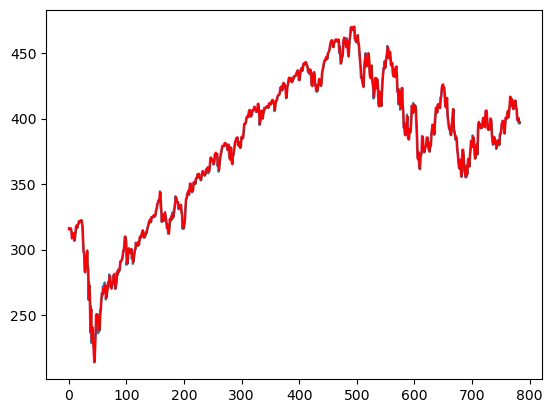

In [7]:
# split into train and test sets
X = arima_df["Close"].values
size = int(len(X) * 0.66)
train = X[0:size] 
test = X[size:len(X)]
history = [x for x in train] # list comprehsion fdor + list
# [var for var in list]
# history = []
# for num in train:
# history.append(num)
# predictions = []
predictions = list()
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
 # evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()